In [1]:
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import os
from tqdm import tqdm

def get_dominant_colors(image_path, k=5):
    img = Image.open(image_path).convert("RGB").resize((300, 300))
    pixels = np.array(img).reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    return kmeans.cluster_centers_.astype(int)

frame_dirs = ['study_me_frames', 
              'cream_frames',
              'kuzuri_frames', 
              'hippo_pain_frames', 
              'truth_in_lies_frames', 
              'mirror_tune_frames', 
              'milabo_frames', 
              'time_left_frames',
              'hanaichi_frames', 
              'inside_joke_frames', 
              'justice_frames', 
              'kira_killer_frames', 
              'shade_frames']

mv_frame_centroids = []
mv_colors = []

for frame_dir in frame_dirs:
    frame_centroids = []
    all_colors = []

    for fname in tqdm(sorted(os.listdir(frame_dir))):
        path = os.path.join(frame_dir, fname)
        try:
            colors = get_dominant_colors(path, k=7)
            avg_color = np.mean(colors, axis=0)
            frame_centroids.append((avg_color, path))
            all_colors.extend(colors)
        except:
            continue

    mv_frame_centroids.append(frame_centroids)
    mv_colors.append(all_colors)

 96%|███████████████████████████████████████▍ | 278/289 [00:42<00:01,  8.90it/s]/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
100%|████████████████████████████████████████▊| 288/289 [00:43<00:00, 10.00it/s]/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
 96%|███████████████████████████████████████▎ | 187/195 [00:27<00:00,  8.63it/s]/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
 99%|███████████████████████████████████

In [2]:
def reduce_palette(colors, final_k=12):
    kmeans = KMeans(n_clusters=final_k, random_state=1).fit(colors)
    return kmeans.cluster_centers_.astype(int)

final_palettes = []
for all_colors in mv_colors:
    palette = reduce_palette(all_colors, final_k=10)
    final_palettes.append(palette)

In [3]:
def get_representative_frames(frame_centroids, num_clusters=5):

    def brightness(rgb):
        # Perceived luminance formula
        return 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    
    filtered = [(c, p) for (c, p) in frame_centroids if (brightness(c) > 80) & (brightness(c) < 170)]

    if len(filtered) < num_clusters:
        filtered = frame_centroids
        
    colors = np.array([fc[0] for fc in filtered])
    paths = [fc[1] for fc in filtered]

    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    labels = kmeans.fit_predict(colors)

    representatives = []
    
    for cluster_idx in range(0, num_clusters):
        # Get all indices in this cluster
        indices = np.where(labels == cluster_idx)[0]
        cluster_colors = colors[indices]
        cluster_paths = [paths[i] for i in indices]
        center = kmeans.cluster_centers_[cluster_idx]

        # Find the closest frame to the cluster center
        dists = np.linalg.norm(cluster_colors - center, axis=1)
        closest_idx = indices[np.argmin(dists)]
        representatives.append(paths[closest_idx])

    return representatives

mv_repr_paths = []
for i in range(0, len(final_palettes)):
    repr_paths = get_representative_frames(mv_frame_centroids[i], num_clusters=5)
    mv_repr_paths.append(repr_paths)

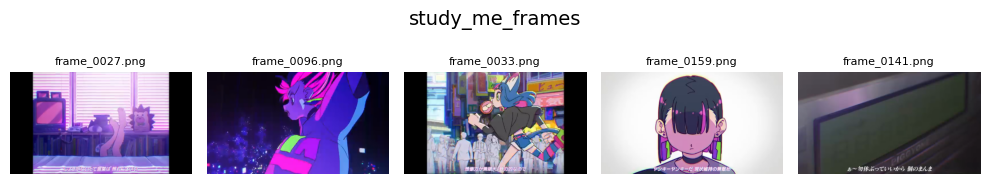

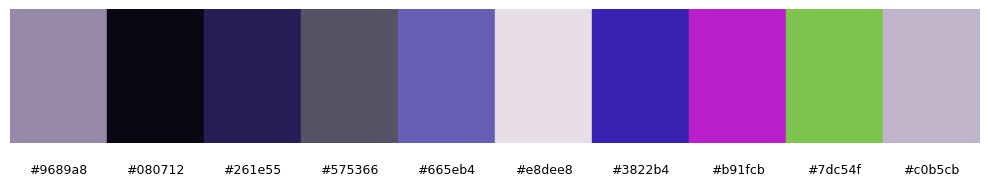

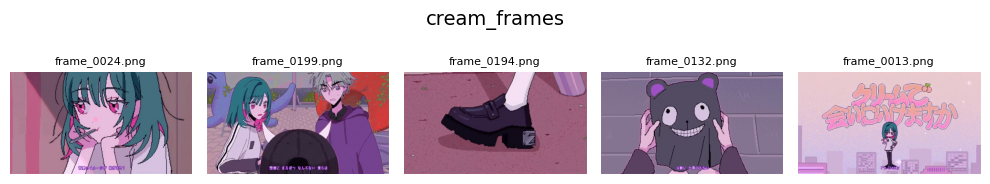

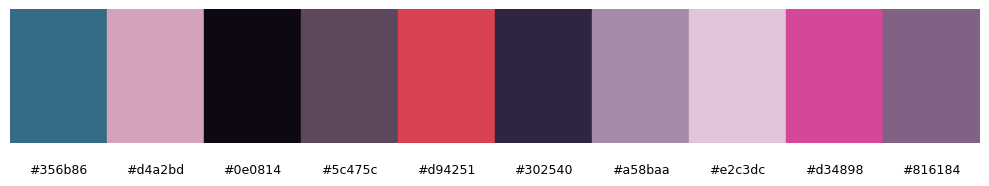

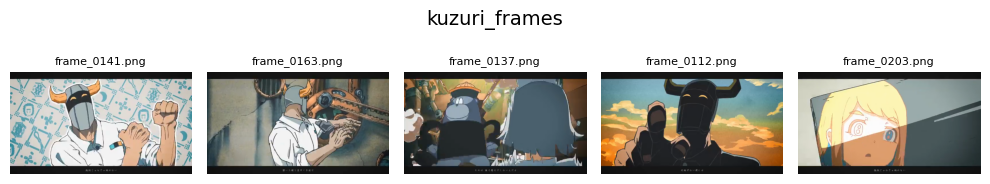

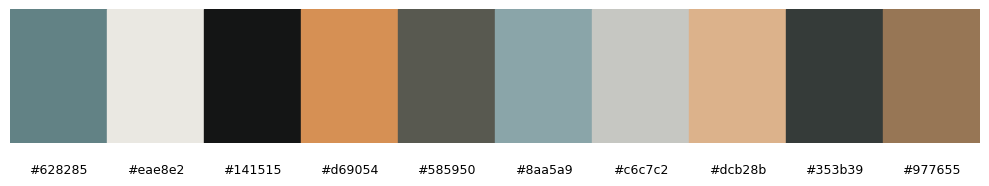

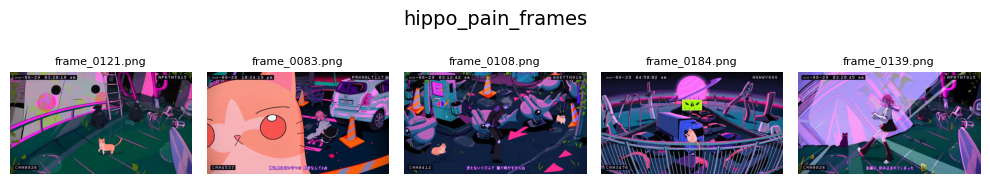

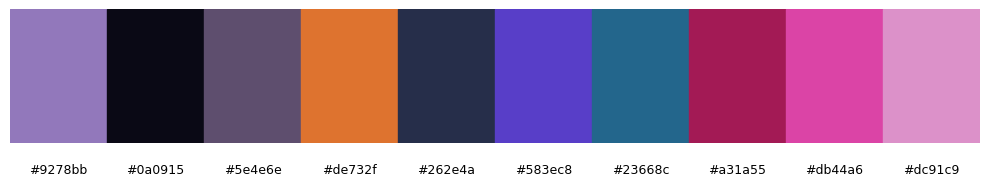

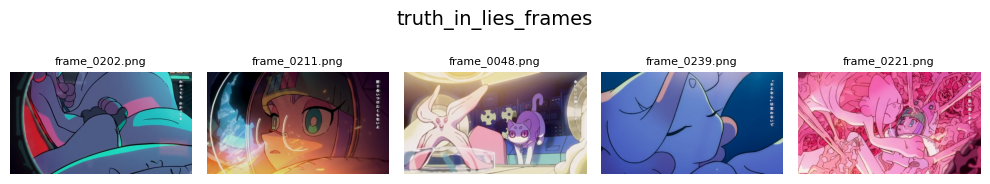

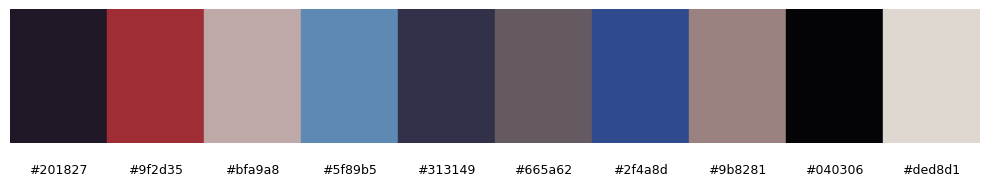

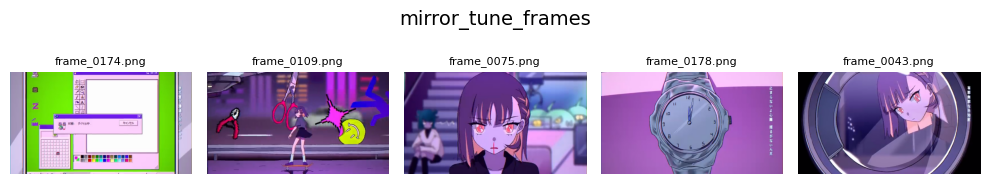

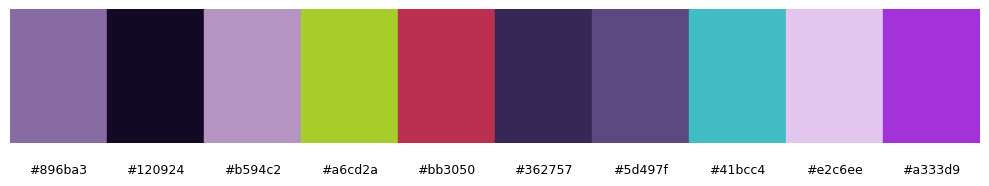

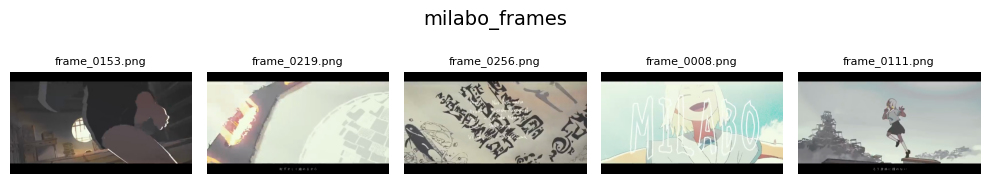

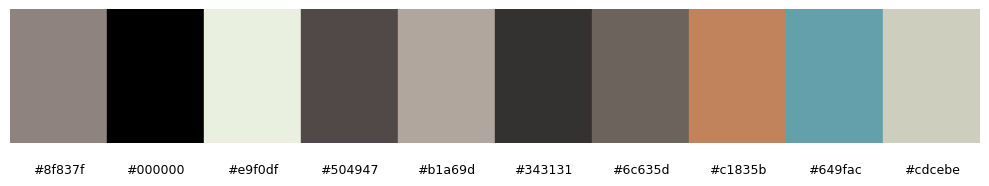

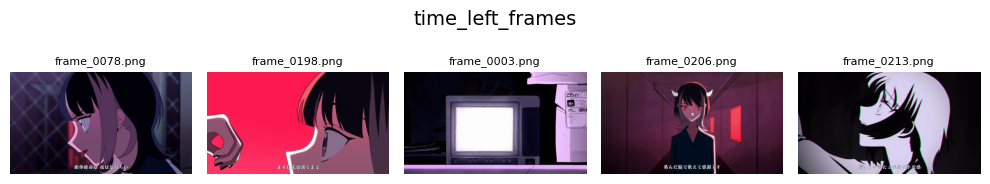

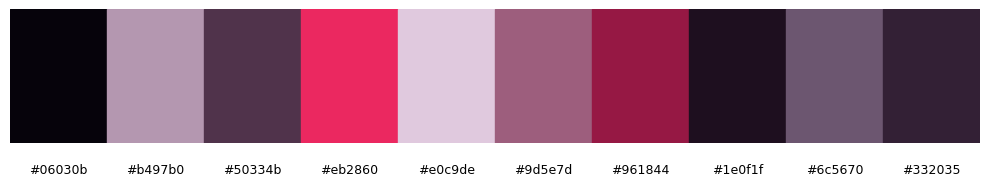

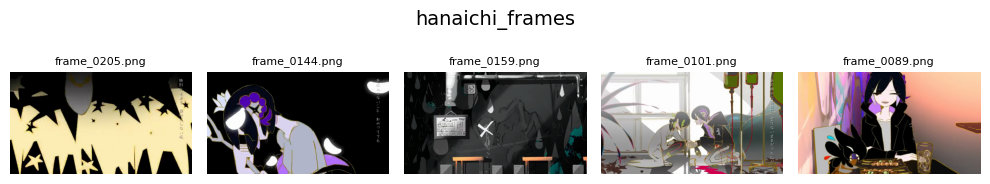

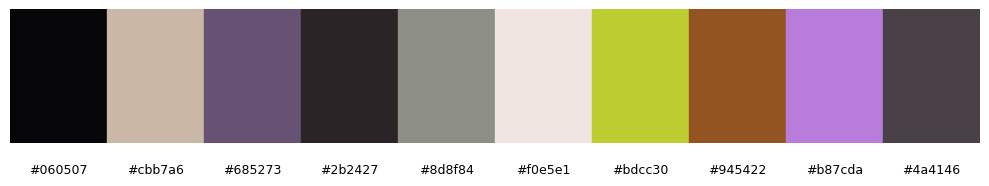

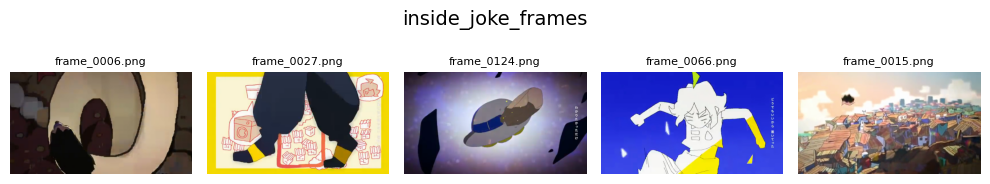

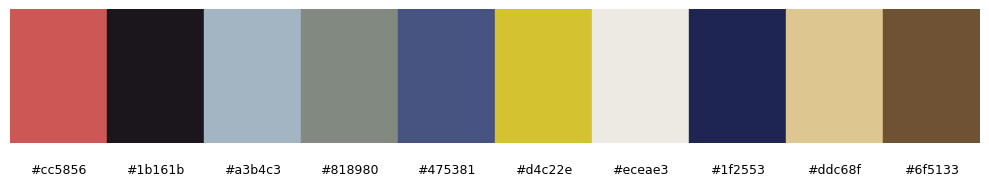

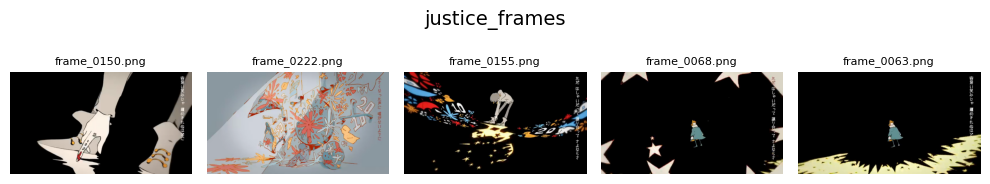

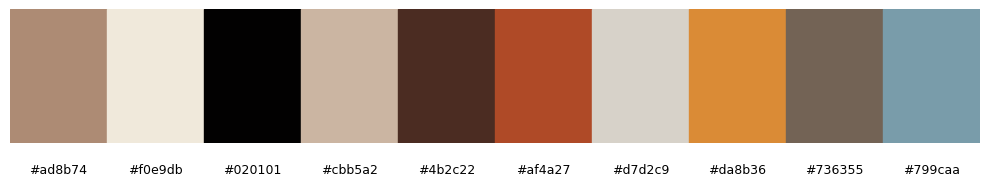

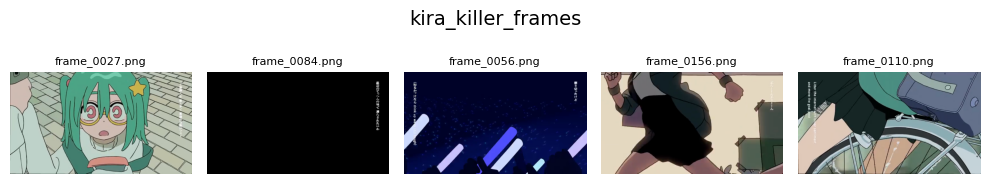

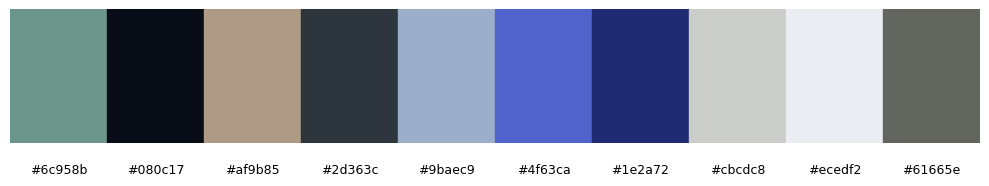

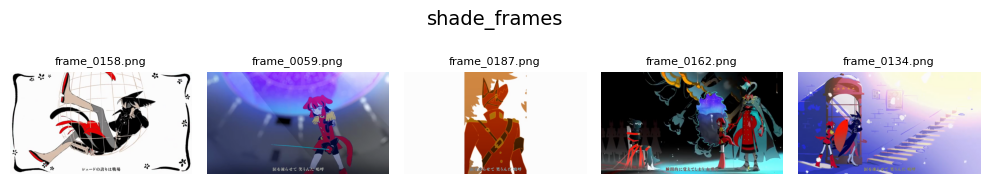

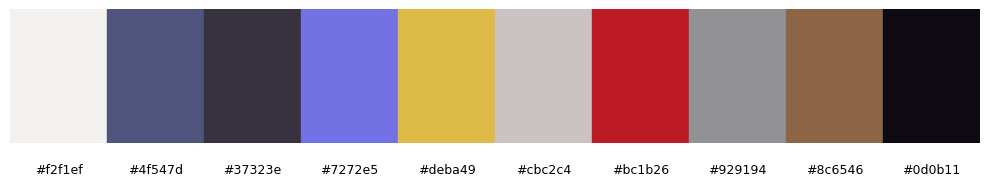

In [4]:
import matplotlib.pyplot as plt

def plot_palette(palette):
    swatch_size = 100
    n = len(palette)
    fig, ax = plt.subplots(figsize=(n, 2))
    
    for i, color in enumerate(palette):
        rgb = tuple(int(c) for c in color)
        hex_val = '#%02x%02x%02x' % rgb
        rect = plt.Rectangle((i, 0), 1, 1, color=np.array(rgb)/255)
        ax.add_patch(rect)
        ax.text(i + 0.5, -0.15, str(hex_val), ha='center', va='top', fontsize=9)

    ax.set_xlim(0, n)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

def display_thumbnails(image_paths, title=None):
    n = len(image_paths)
    fig, axes = plt.subplots(1, n, figsize=(n * 2, 2))

    if title:
        fig.suptitle(title, fontsize=14)

    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(img_path), fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

for i in range(0, len(final_palettes)):
    display_thumbnails(mv_repr_paths[i], title=f"{frame_dirs[i]}")
    plot_palette(final_palettes[i])

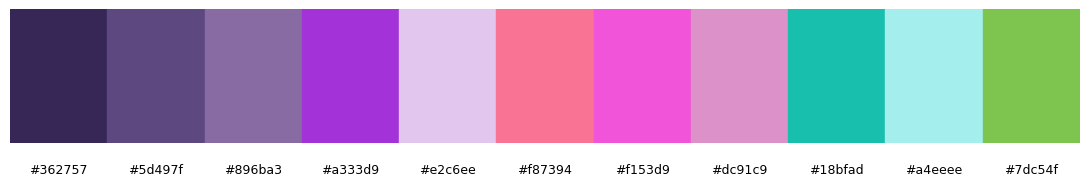

In [5]:

def plot_color_swatches(color_list):
    n = len(color_list)
    fig, ax = plt.subplots(figsize=(n, 2))

    for i, hex_color in enumerate(color_list):
        rect = plt.Rectangle((i, 0), 1, 1, color=hex_color)
        ax.add_patch(rect)
        ax.text(i + 0.5, -0.15, hex_color, ha='center', va='top', fontsize=9)

    ax.set_xlim(0, n)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % tuple(rgb)

def get_dominant_colors(image_path, k=5):
    img = Image.open(image_path).convert("RGB").resize((1000, 1000))
    pixels = np.array(img).reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    return kmeans.cluster_centers_.astype(int)
    
dominant_colors = get_dominant_colors('mirrortune.jpg', 15)
mirrortune = [rgb_to_hex(color) for color in dominant_colors]

dominant_colors = get_dominant_colors('nirachan.jpg', 15)
nirachan = [rgb_to_hex(color) for color in dominant_colors]

colors = ['#362757','#5d497f', '#896ba3', '#a333d9', '#e2c6ee', '#f87394', '#f153d9', '#dc91c9', '#18bfad', '#a4eeee', '#7dc54f']

# colors = mirrortune
# plot_color_swatches(mirrortune)
# plot_color_swatches(nirachan)
# plot_color_swatches(colors)

# colors = []
# for rgb in final_palettes[3]:
#     colors.append(rgb_to_hex(rgb))

plot_color_swatches(colors)

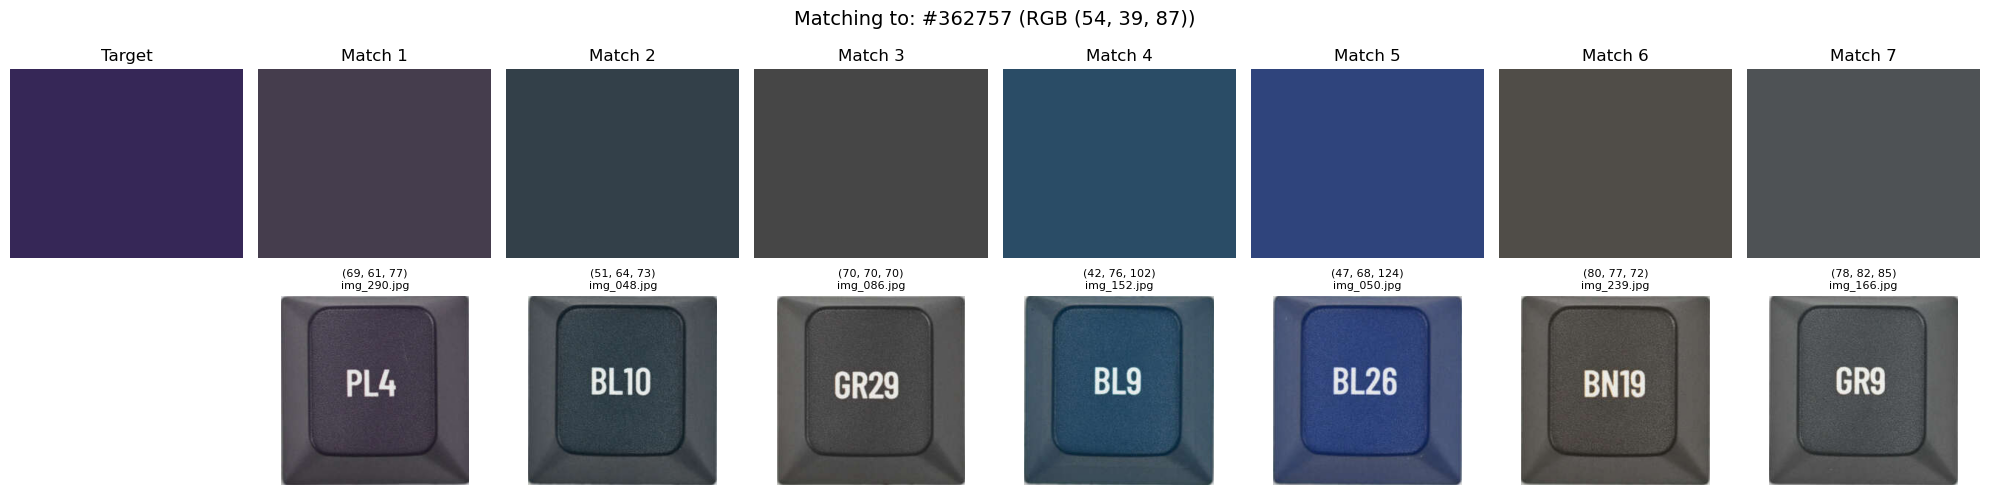

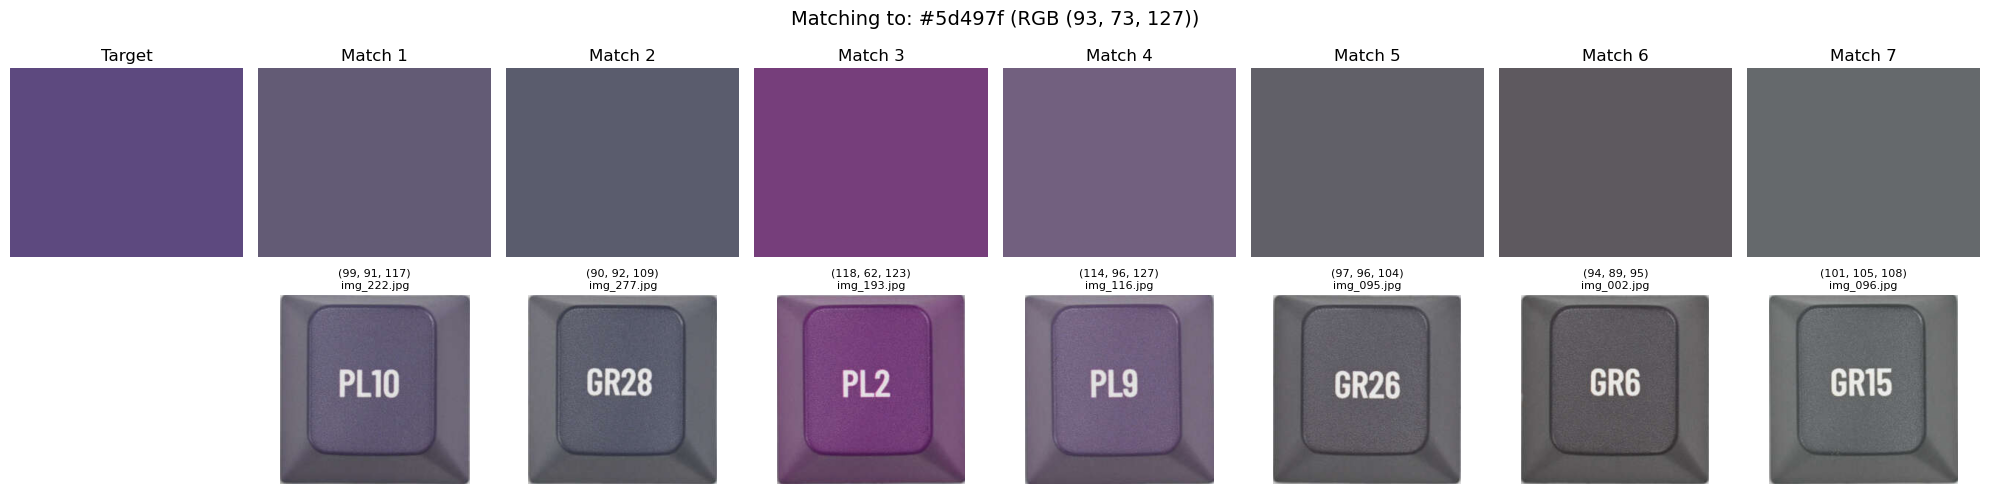

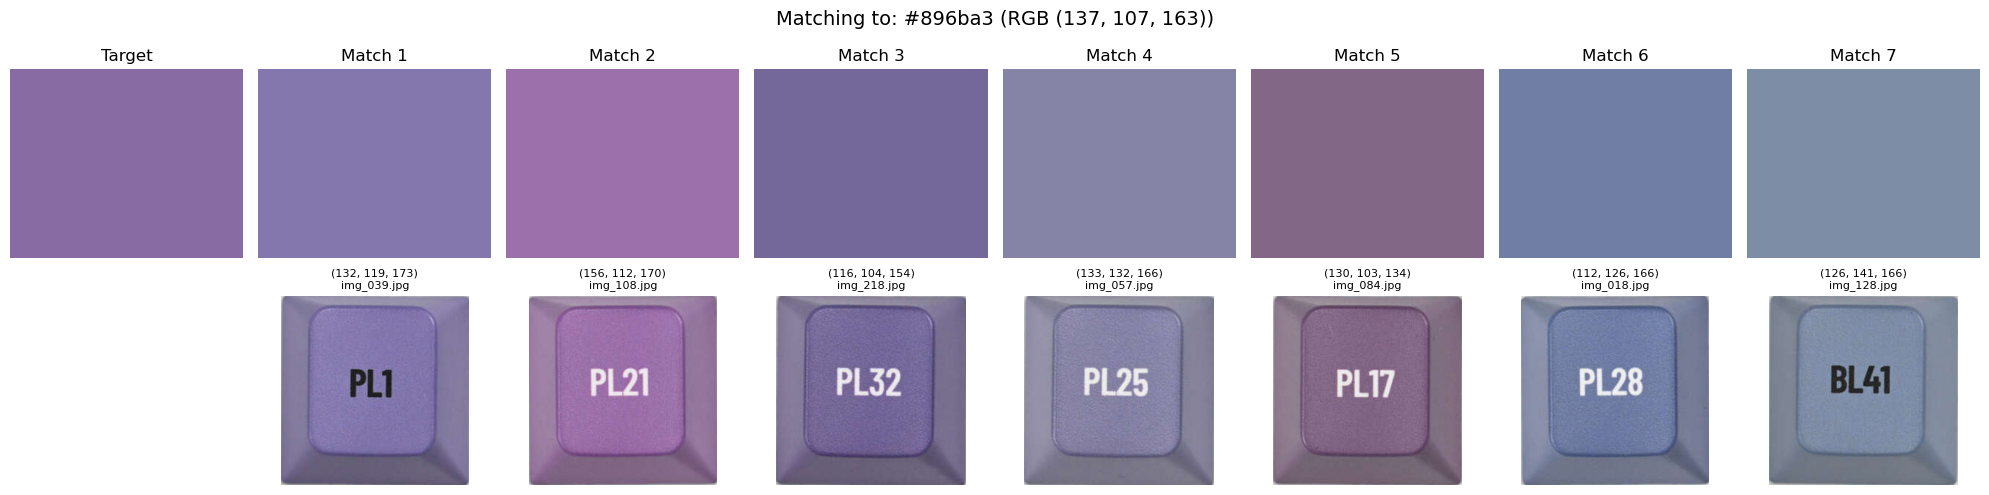

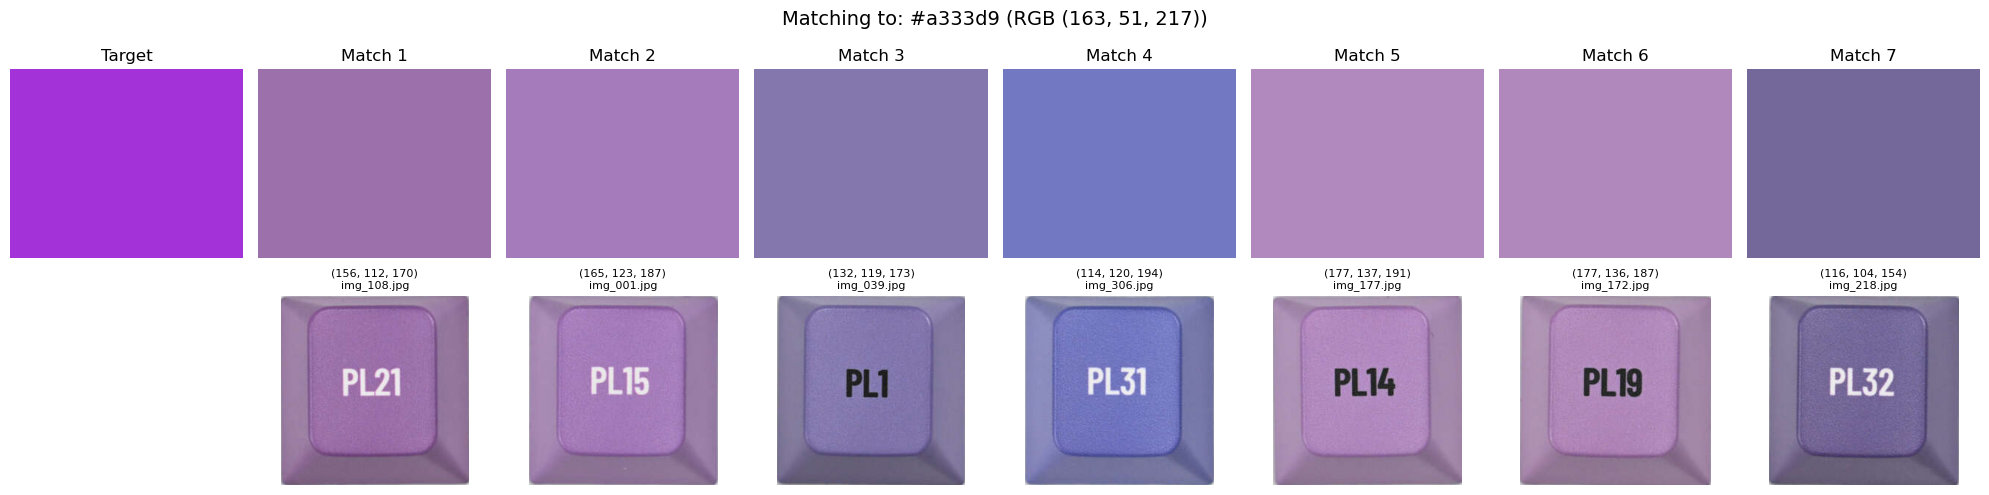

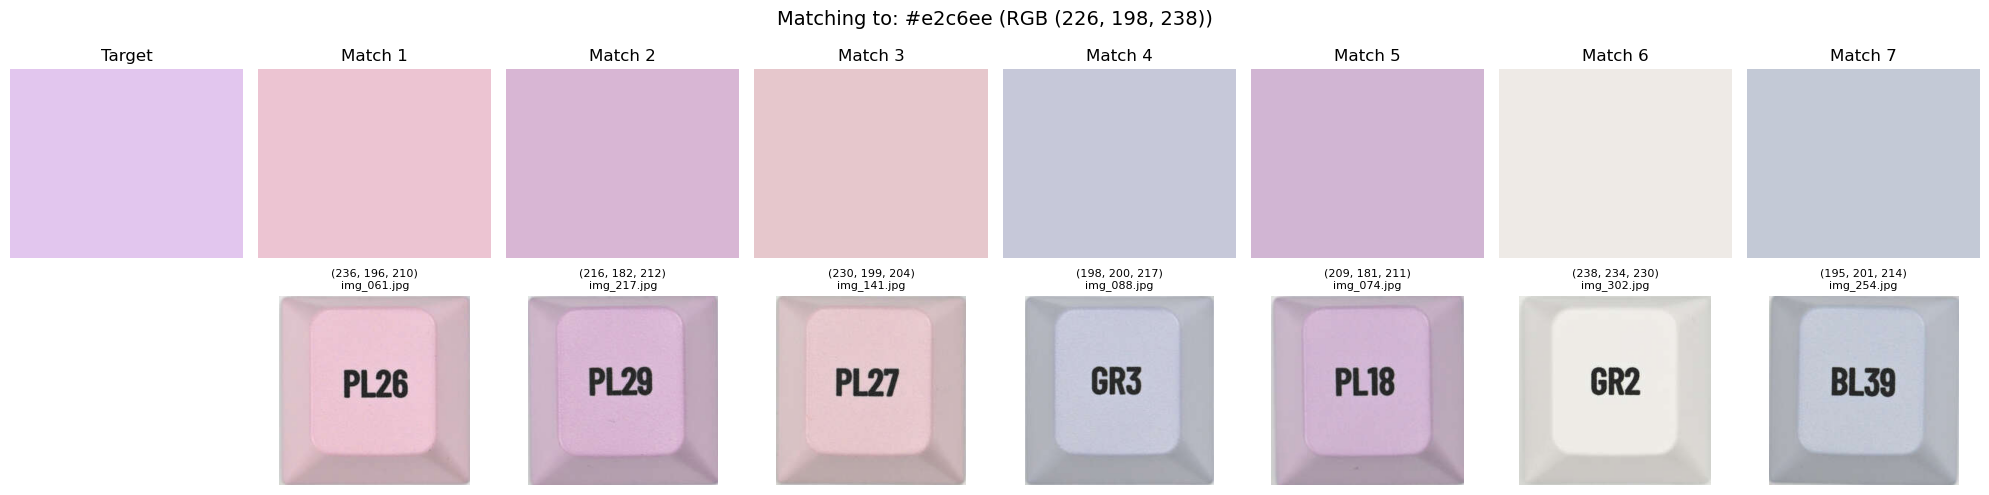

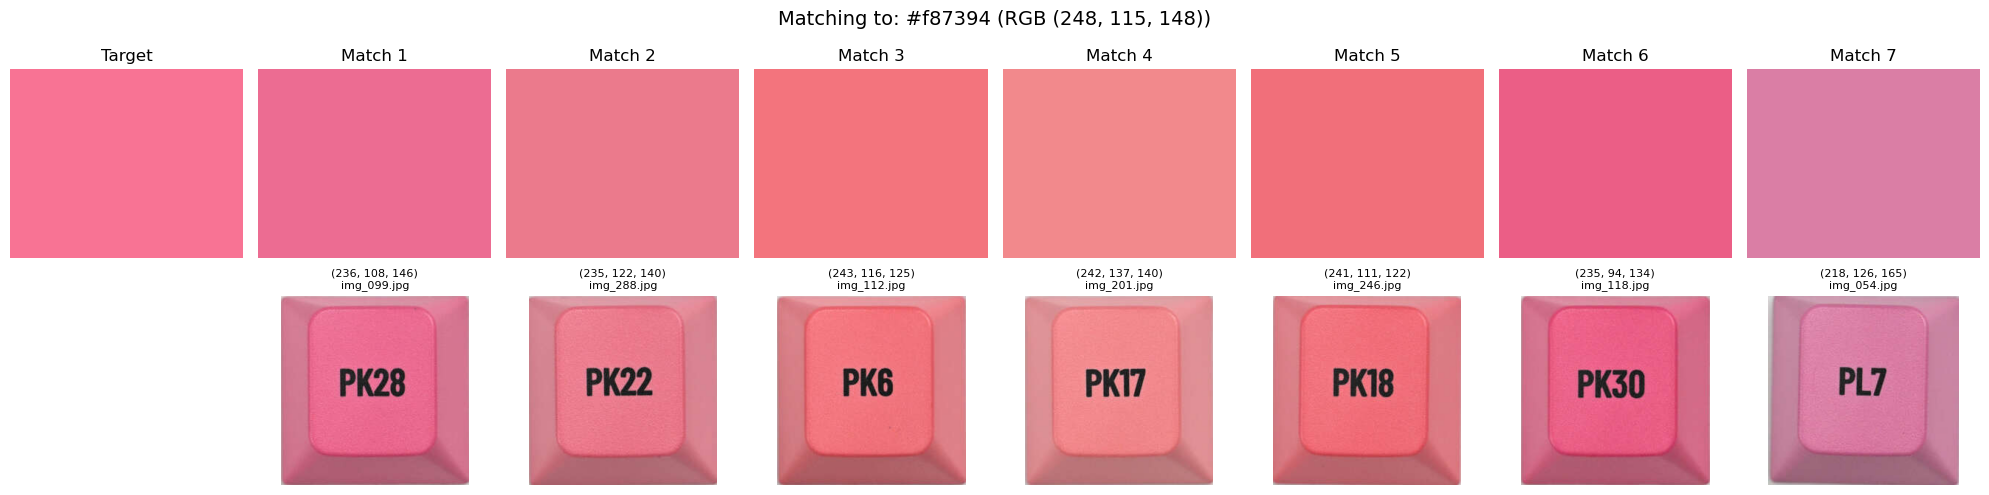

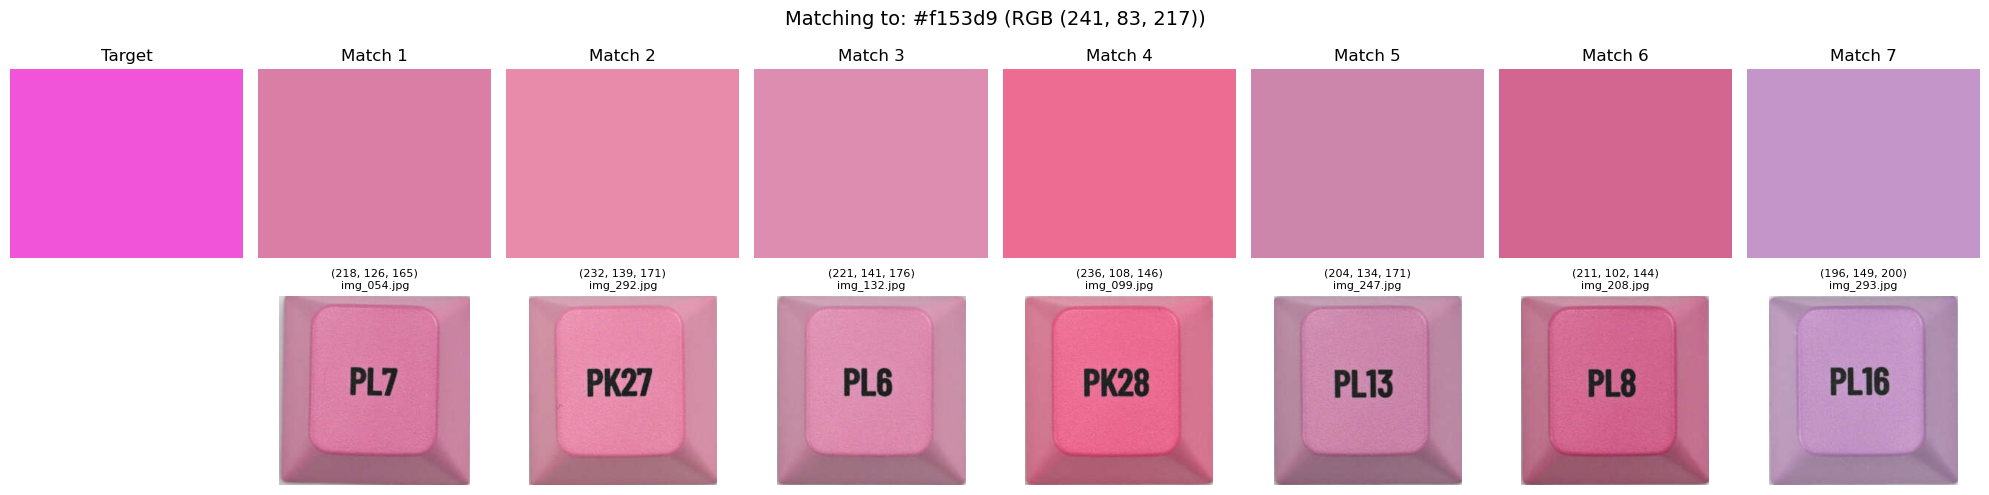

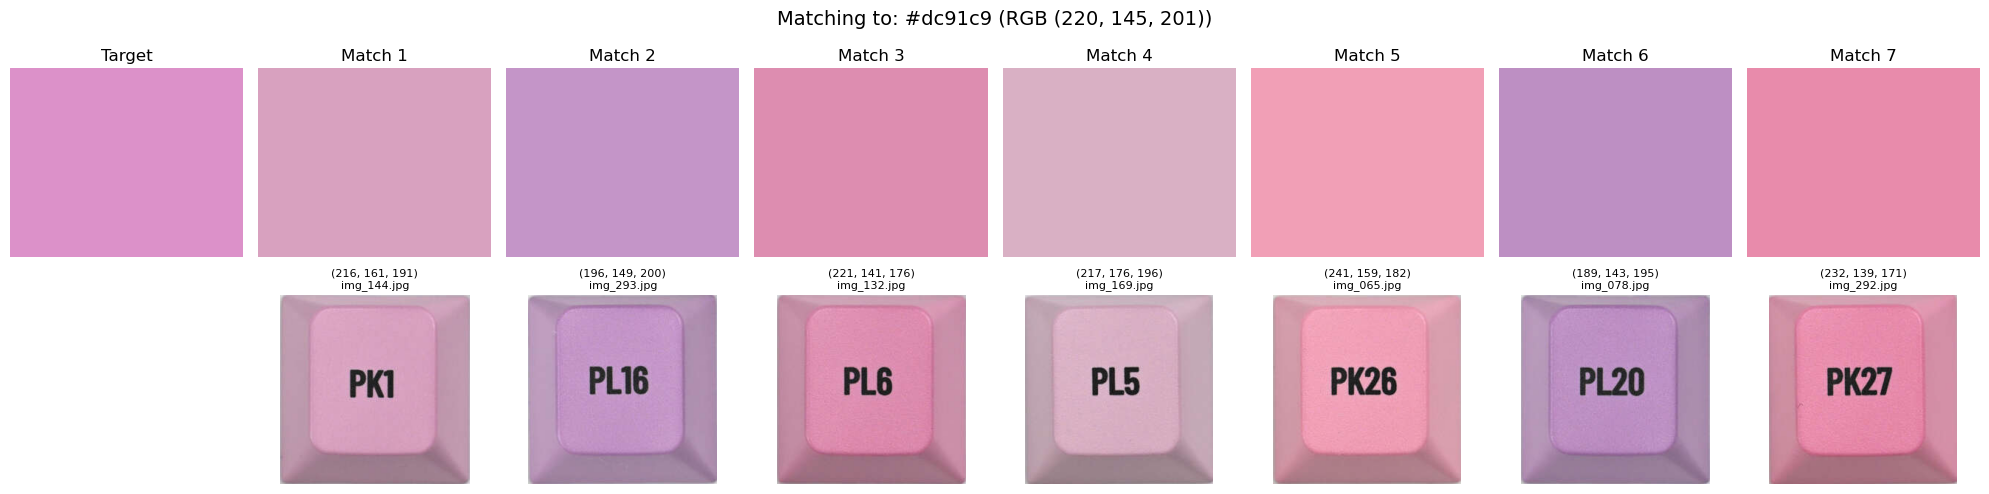

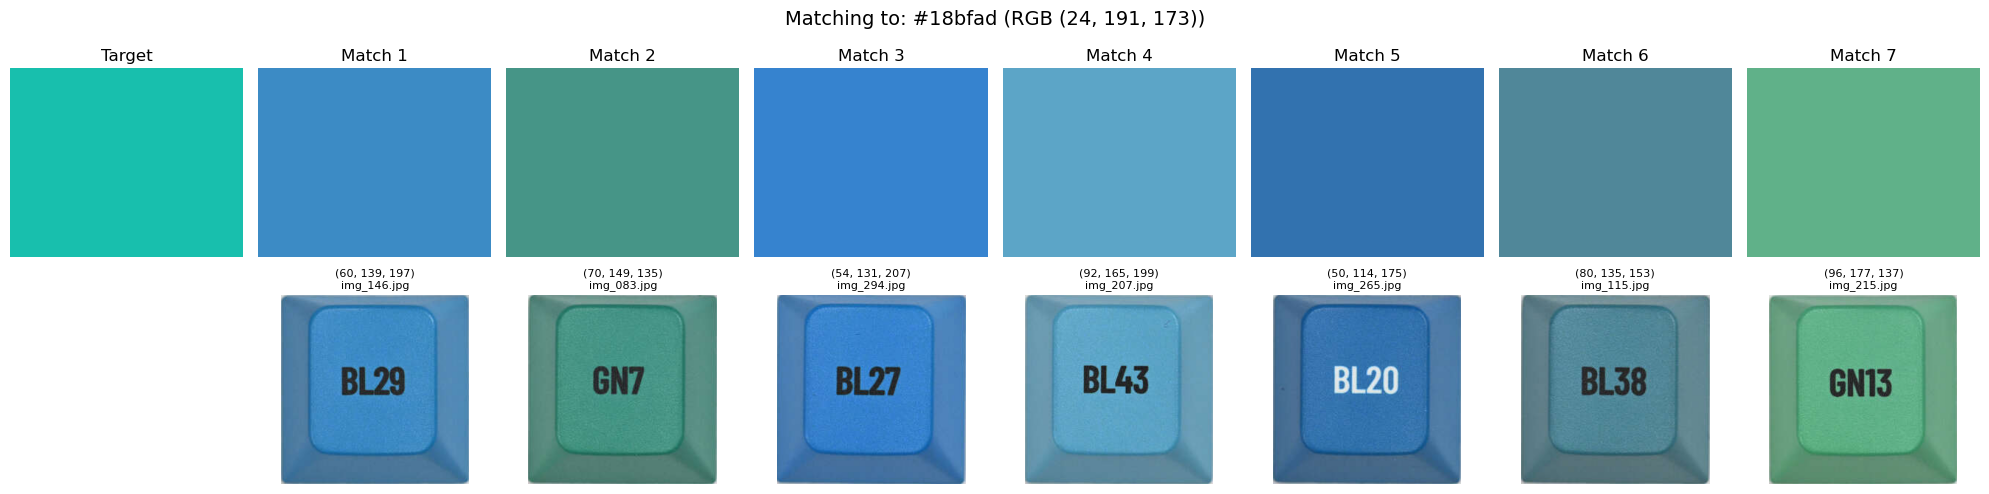

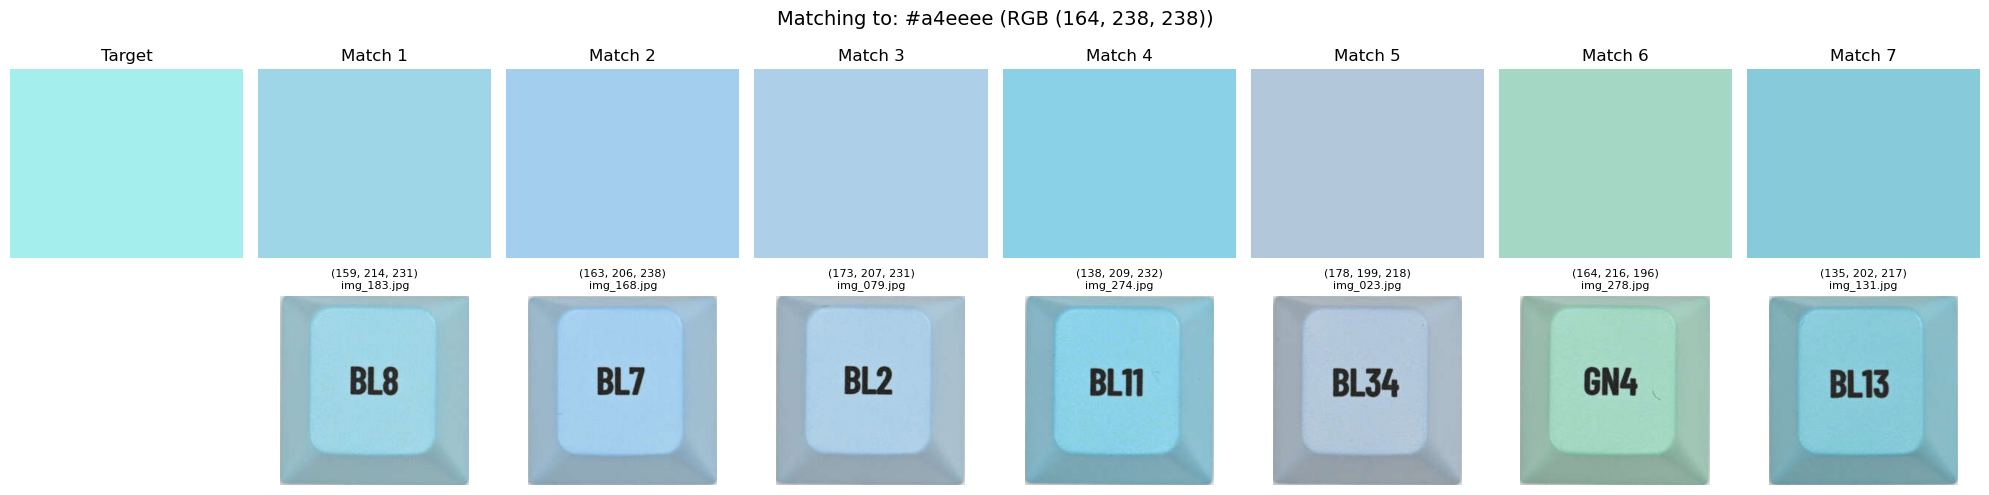

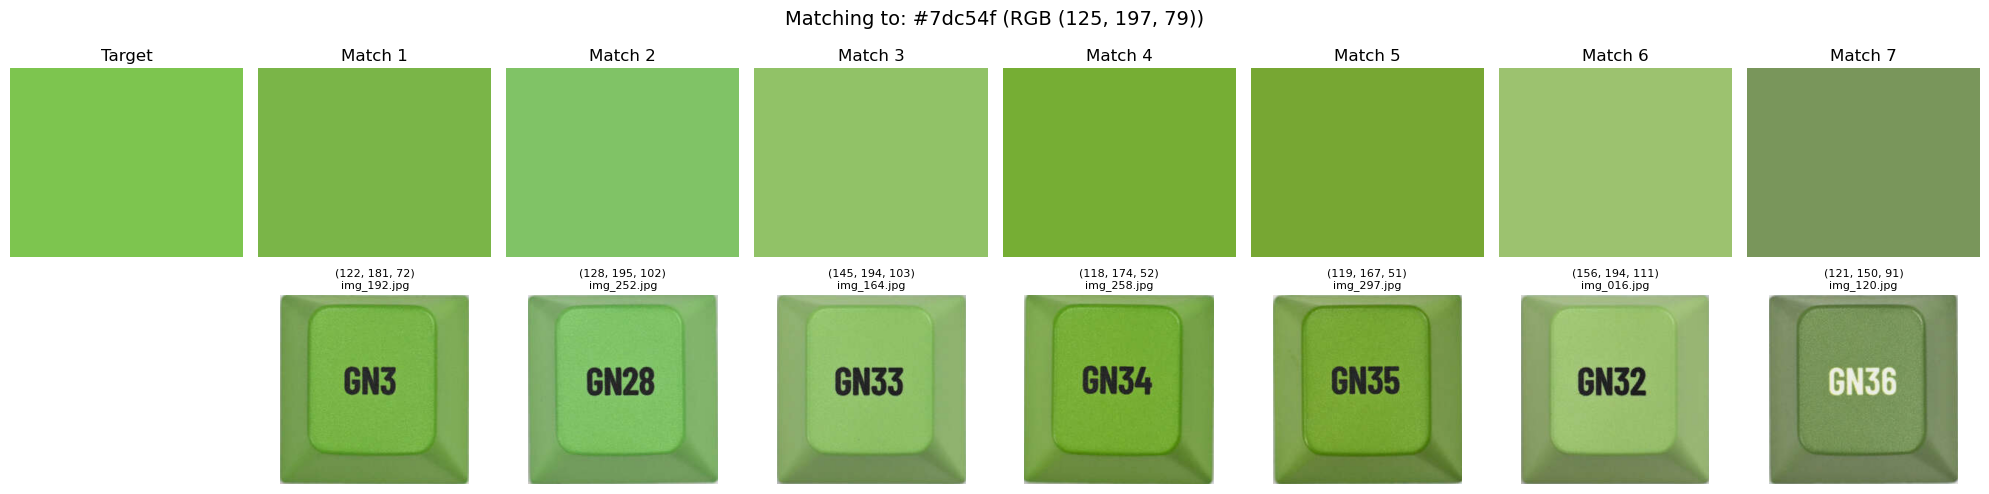

In [6]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


top_k = 7
target_colors_hex = colors
target_colors_rgb = [tuple(int(h[i:i+2], 16) for i in (1, 3, 5)) for h in target_colors_hex]
keycap_dir = './downloaded_images'

keycap_data = []
for fname in os.listdir(keycap_dir):
    if not fname.lower().endswith('.jpg'):
        continue
    path = os.path.join(keycap_dir, fname)
    try:
        img = Image.open(path).convert('RGB')
        cropped = img.crop((90, 40, 180, 70))
        np_crop = np.array(cropped)
        avg_color = np_crop.reshape(-1, 3).mean(axis=0)
        keycap_data.append({
            'path': path,
            'avg_rgb': avg_color.astype(int),
            'full_img': img
        })
    except Exception as e:
        print(f"Error loading {fname}: {e}")

def rgb_distance(c1, c2):
    return np.linalg.norm(np.array(c1) - np.array(c2))

for i, (target_hex, target_rgb) in enumerate(zip(target_colors_hex, target_colors_rgb)):
    dists = [(rgb_distance(cap['avg_rgb'], target_rgb), cap) for cap in keycap_data]
    top_matches = sorted(dists, key=lambda x: x[0])[:top_k]

    fig, axes = plt.subplots(2, top_k + 1, figsize=(2.5 * (top_k + 1), 5))
    fig.suptitle(f"Matching to: {target_hex} (RGB {target_rgb})", fontsize=14)

    # Show target color
    axes[0, 0].add_patch(plt.Rectangle((0, 0), 1, 1, color=np.array(target_rgb)/255))
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Target")
    axes[1, 0].axis('off')

    for j, (dist, cap) in enumerate(top_matches):
        col = j + 1
        axes[0, col].add_patch(plt.Rectangle((0, 0), 1, 1, color=np.array(cap['avg_rgb']) / 255))
        axes[0, col].axis('off')
        axes[0, col].set_title(f"Match {col}")

        axes[1, col].imshow(cap['full_img'])
        axes[1, col].axis('off')
        axes[1, col].set_title(f"{tuple(cap['avg_rgb'])}\n{os.path.basename(cap['path'])}", fontsize=8)

    for row in axes:
        for ax in row:
            if not ax.has_data():
                ax.axis('off')

    plt.tight_layout()
    plt.show()


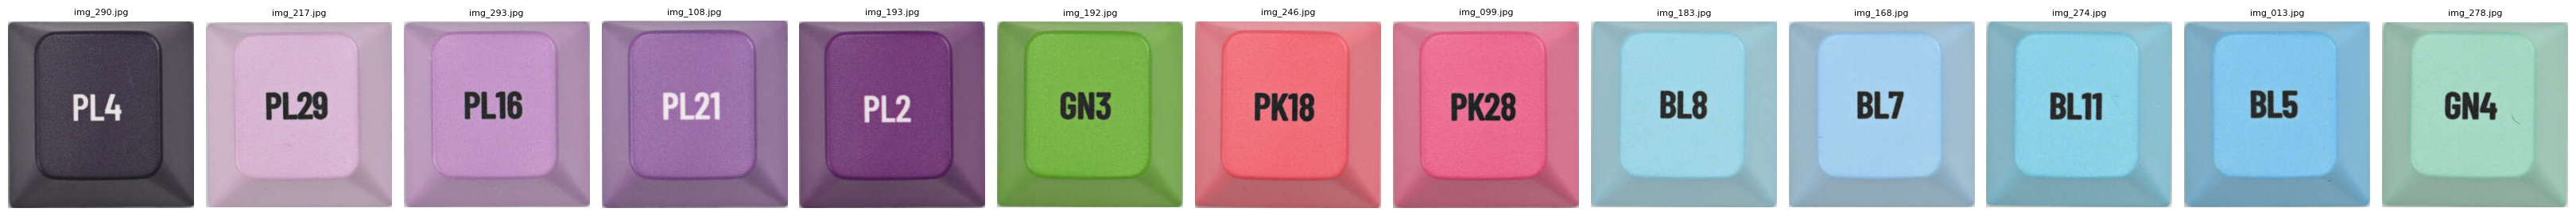

In [7]:

keycaps = ['img_290.jpg', 
           'img_217.jpg', 'img_293.jpg', 'img_108.jpg', 'img_193.jpg',
           'img_192.jpg', 
           'img_246.jpg', 'img_099.jpg', 
           'img_183.jpg', 'img_168.jpg', 'img_274.jpg', 'img_013.jpg',  
           'img_278.jpg']
keycap_dir = './downloaded_images'

# Load images
images = []
for fname in keycaps:
    path = os.path.join(keycap_dir, fname)
    try:
        img = Image.open(path).convert('RGB')
        images.append((fname, img))
    except Exception as e:
        print(f"Error loading {fname}: {e}")

# Plot them
n = len(images)
fig, axes = plt.subplots(1, n, figsize=(n * 2.5, 3))

if n == 1:
    axes = [axes]

for ax, (fname, img) in zip(axes, images):
    ax.imshow(img)
    ax.set_title(fname, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()


Merged palette


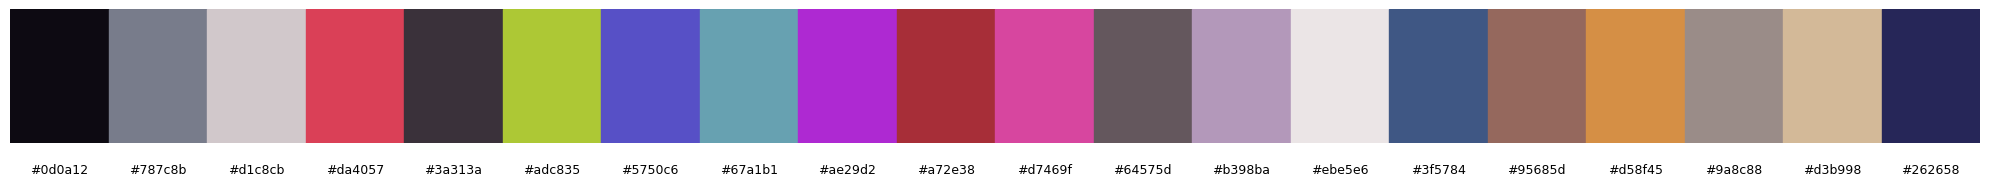

In [8]:
# Flatten all colors into a single list
all_video_colors = np.vstack(final_palettes)

k = 20

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(all_video_colors)
merged_palette = kmeans.cluster_centers_.astype(int)

print("Merged palette")
plot_palette(merged_palette)